In [956]:
import pandas as pd
import re
import glob
import copy
import matplotlib.pyplot as plt


In [957]:
def Q1_function():
    """
    :type : None
    :rtype: List[String]
    """
    files = glob.glob('../data_raw/*.xlsx') 
    return files



In [958]:
# Call the function and print the result. This result is used in subsequent questions.
filenames = Q1_function()
print(filenames)

['../data_raw\\Python-QUIZ Coercion (6 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Conditionals (6 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Dictionaries (10 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Exceptions (10 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Functions (18 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Iterations (6 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Lists (10 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Sets (7 min)-grades.xlsx', '../data_raw\\Python-QUIZ Strings (5 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Tuples (10 min.)-grades.xlsx']


In [959]:
def Q2_function(files, s):
    """
    :type : List[String], String
    :rtype: String
    """
    
    for file in files:
        if re.search(s,file):
            return file
    
            

In [960]:
file = Q2_function(filenames, s = "Dictionaries")
print(file)

../data_raw\Python-QUIZ Dictionaries (10 min.)-grades.xlsx


In [961]:
def Q3_function(files, s):
    """
    :type : List[String], String
    :rtype: Pandas DataFrame
    """
    file = Q2_function(files, s)
    df = pd.read_excel(file)
    return df
    

In [962]:
# Call the function and print the result. This result is used in subsequent questions.
functions_df = Q3_function(filenames, s = "Functions")
print(functions_df)


    Unnamed: 0     State                  Started on  \
0            0  Finished    February 5 2018  3:19 PM   
1            1  Finished    February 4 2018  4:01 PM   
2           12  Finished    February 6 2018  3:57 PM   
3            2  Finished   February 10 2018  4:05 PM   
4            3  Finished    February 4 2018  4:59 PM   
5            4  Finished    February 5 2018  5:20 PM   
6            5  Finished   February 10 2018  9:49 PM   
7            6  Finished    February 5 2018  8:30 PM   
8            7  Finished   February 13 2018  4:17 AM   
9            8  Finished   February 12 2018  2:19 PM   
10           9  Finished  February 13 2018  10:45 AM   
11          10  Finished   February 11 2018  1:48 AM   
12           4  Finished    February 5 2018  5:20 PM   
13           5  Finished   February 10 2018  9:49 PM   
14          11  Finished   February 13 2018  7:07 PM   
15          12  Finished    February 6 2018  3:57 PM   
16          13  Finished    February 5 2018  6:5

In [963]:
def Q4_function(dataframe):
    """
    :type : DataFrame
    :rtype: [String], DataFrame, DataFrame
    """
    # Find all the names of the columns and return as a list
    column_names = list(dataframe)
   
    # Find the subset of the DataFrame
    df_subset = dataframe.loc[:, ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]]
   
    # Return the top 10 rows
    top_10 = dataframe.head(10)
   
    return column_names[1:], df_subset, top_10

In [964]:
names, df_subset, top_10 = Q4_function(functions_df)

print("Column Names")
print(names)
print()
print("Subsetted Data")
print(df_subset)
print()
print("Top 10 Rows")
print(top_10)

Column Names
['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00', 'id']

Subsetted Data
    id       Time taken  Grade/45.00  Q. 1 /5.00  Q. 2 /10.00  Q. 3 /6.00  \
0    0  14 mins 16 secs           32           5            6           6   
1    1  17 mins 54 secs           31           5            8           6   
2   12  15 mins 44 secs           20           3            4           3   
3    2          18 mins           30           5            6           6   
4    3  17 mins 31 secs           26           5            6           6   
5    4  17 mins 59 secs           25           5            6           6   
6    5          18 mins           24           5            6           6   
7    6          18 mins           23           5            6           0   
8    7    18 mins 1 sec           23           4            4           6   
9    8  16 mins 44 secs           22       

In [965]:
def Q5_function(df):
   
    """
    :type : DataFrame
    :rtype: [String], DataFrame
    """
    # Identify the data type of every column
    column_types = df.dtypes.tolist()
    
    #Strip all white spaces from the columns
    df.columns = [re.sub('\s','',x) for x in df.columns]
   
    # Check if 'Time taken' column has NA or empty values and replace with 0
    if df["Timetaken"].isnull().any():
        df["Timetaken"].fillna("0 mins 0 sec")
   
    def time_to_int(x):
        match = re.search(r'(\d{0,2}) mins (?:(\d{0,2}) sec(?:s)?)?', x)
        if match:
            time = int(match.group(1))*60
            if match.group(2):
                #print(match.group(2))
                time += int(match.group(2))
            return time
        else:
            match = re.search(r'(\d{0,2}) mins ?', x)
            if match:
                time = int(match.group(1))*60
                return time
    df["time"] = df["Timetaken"].apply(lambda x : time_to_int(x))
    df = df.drop ("Timetaken", axis = 1)
   
    return column_types, df


In [966]:
column_types, Q5_df = Q5_function(df_subset)
print("Column Datatypes")
print(column_types)
print()
print("New Update DataFrame")
print(Q5_df)

Column Datatypes
[dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O')]

New Update DataFrame
    id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00 Q.4/6.00 Q.5/12.00  \
0    0           32         5          6         6     3.00     12.00   
1    1           31         5          8         6        -     12.00   
2   12           20         3          4         3        -     10.00   
3    2           30         5          6         6     3.00     10.00   
4    3           26         5          6         6     3.00      6.00   
5    4           25         5          6         6     6.00      2.00   
6    5           24         5          6         6     3.00      4.00   
7    6           23         5          6         0     0.00      6.00   
8    7           23         4          4         6     3.00      6.00   
9    8           22         4          4         6     0.00      8.00   
10   9           22         5

In [967]:
def Q6_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """
    df1 = df.copy()
   
    # Identify which columns and convert them to int/float
    df1[["Q.4/6.00", "Q.5/12.00", "Q.6/6.00"]] = df1[["Q.4/6.00", "Q.5/12.00", "Q.6/6.00"]].apply(pd.to_numeric, errors='coerce')
   
    # Remove duplicate rows from dataframe
    df1.drop_duplicates(inplace = True)
   
    # Replace missing data with mean of other values
    df1.fillna(df.mean(), inplace = True)

    # Find the mean values of all columns except 'id'. Append these as a row to your dataframe
    df1.loc[23] = df1.iloc[:, 1:].mean()
    df1.fillna(max(df1.loc[:, "id"]) + 1, inplace=True)
    return df1

In [968]:
Q6_df = Q6_function(Q5_df)
print(Q6_df)


      id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00  Q.4/6.00  Q.5/12.00  \
0    0.0    32.000000  5.000000   6.000000  6.000000       3.0      12.00   
1    1.0    31.000000  5.000000   8.000000  6.000000      19.0      12.00   
2   12.0    20.000000  3.000000   4.000000  3.000000      19.0      10.00   
3    2.0    30.000000  5.000000   6.000000  6.000000       3.0      10.00   
4    3.0    26.000000  5.000000   6.000000  6.000000       3.0       6.00   
5    4.0    25.000000  5.000000   6.000000  6.000000       6.0       2.00   
6    5.0    24.000000  5.000000   6.000000  6.000000       3.0       4.00   
7    6.0    23.000000  5.000000   6.000000  0.000000       0.0       6.00   
8    7.0    23.000000  4.000000   4.000000  6.000000       3.0       6.00   
9    8.0    22.000000  4.000000   4.000000  6.000000       0.0       8.00   
10   9.0    22.000000  5.000000   8.000000  6.000000       3.0      19.00   
11  10.0    21.000000  5.000000  10.000000  6.000000      19.0      19.00   

In [969]:
def Q7_function(file):
    """
    :type : String
    :rtype: Float
    """
    df = Q3_function(filenames, s = file)
    mean_,std_,q1,q2,q3,max_,min_ =  df["Grade/21.00"].describe()[["mean", "std", "25%", "50%", "75%", "max", "min"]].round(2)
    return mean_,std_,q1,q2,q3,max_,min_

In [970]:
# Call the function and print the results.
mean_,std_,q1,q2,q3,max_,min_ = Q7_function(file="Exceptions")
print("Mean:", mean_)
print("Std. Dev.:", std_)
print("First Quantile", q1)
print("Second Quantile", q2)
print("Third Quantile", q3)
print("Max:", max_)
print("Min:", min_)

Mean: 14.83
Std. Dev.: 2.19
First Quantile 13.46
Second Quantile 14.66
Third Quantile 16.62
Max: 18.5
Min: 10.83


In [971]:
def Q8_function(file):
    #Compare the plot lines to the values calculated in the previous question.
    df = Q3_function(filenames, file)
    Q8_plot = df[['Grade/21.00']].plot.box(return_type='axes')
    return Q8_plot

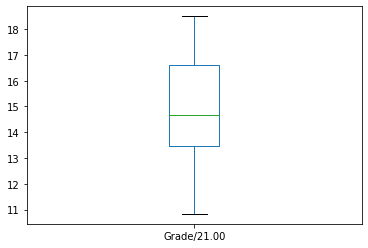

In [972]:
# Call the function. Plot will display.
Q8_function(file='Exceptions')

In [973]:
def Q9_function(file):
    #Return the number of rows and columns present in the 'Strings' dataset
    df = Q3_function(filenames, file)
    return df.shape
    

In [974]:
# Call the function and print the results
rows, columns = Q9_function (file='Strings')
print("Rows:",rows)
print("Columns:",columns)

Rows: 17
Columns: 8


In [975]:
def Q10_function(df):
    #Which students scored 0
    zero = df.groupby(['Q.5/12.00'])['id'].apply(list)[1]
    #How many students achieved the maximum possible score
    max_score = max(df.loc[:,'Q.5/12.00'])
    maximum_list = df.groupby(['Q.5/12.00']).get_group(max_score)
    maximum = len(maximum_list)  
    #Consider NA/missing values as 0
    zero_NA = df.groupby(['Q.5/12.00'])['id'].apply(list)[0]
    zero.extend(zero_NA)
    zero.sort()
    return zero, maximum
    

In [976]:
# Call the function and print the results
zero, maximum = Q10_function(Q5_df)
print("Students scoring zero :",zero)
print("Number of students with maximum score :",maximum)

Students scoring zero : [9, 10, 13, 17, 18]
Number of students with maximum score : 2


In [977]:
def Q11_function():
    #Call the function you wrote for Question 5 to convert time and remove spaces in columns
    dftuples = Q3_function(filenames, "Tuples")
    col_tuples, dftuples = Q5_function(dftuples)
    dftaxonomy = Q3_function(filenames, "Taxonomy")
    col_taxonomy, dftaxonomy = Q5_function(dftaxonomy)    
    #Use the pd.merge() function.
    Q11_df = pd.merge (dftuples, dftaxonomy, how = 'inner', on = 'id')
    #Create a new column 'Total_score' which is the sum of the scores of the two quizzes.
    Q11_df['Total_score'] = Q11_df["Grade/20.00"] + Q11_df["Grade/21.00"]
    max_scorer = Q11_df.loc[Q11_df['Total_score'].idxmax()]['id']
    return Q11_df,max_scorer


In [978]:
# Call the function and print the results. The DataFrame will be used in subsequent questions
Q11_df,max_scorer = Q11_function()
print("Max scorer :",max_scorer)

Max scorer : 10


In [979]:
def Q12_function(df):
    #Sort the list before returning.
    #Can you code it in one line?
    df['TotalTime'] = df['time_x'] + df['time_y']
    ids = df['id'].where((df.TotalTime < 1200)).dropna().astype(int).tolist()    
    ids.sort()
    df = df.drop(['TotalTime'], axis=1, inplace=True)
    return ids

In [980]:
# Call the function and print the results.
# Q12_function(Q11_df)
ids = Q12_function(Q11_df)
print("ID of students :",ids)

ID of students : [3, 4, 7, 8, 12, 18]


In [981]:
def Q13_function(df):   
    #Use 5 bins
    #Use 'cut' and 'groupby'.
    df1 = df.copy()
    df1 = df1.iloc[:-1]
    df1['bins'] = pd.cut(df1['Grade/45.00'], 5)
    bins = df1.groupby(['bins']).size()
    res = pd.DataFrame({'bins':bins.index,'count':bins.values}) 
    return res


In [982]:
# Call the function and print the results.
Q13_df = Q13_function(Q6_df)
print(Q13_df)

             bins  count
0  (12.981, 16.8]      4
1    (16.8, 20.6]      3
2    (20.6, 24.4]      7
3    (24.4, 28.2]      2
4    (28.2, 32.0]      3


In [983]:
import unittest
import warnings
class TestNotebook(unittest.TestCase):
    
    def test_Q01_function(self):
        res = ['../data_raw\\Python-QUIZ Coercion (6 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Conditionals (6 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Dictionaries (10 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Exceptions (10 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Functions (18 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Iterations (6 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Lists (10 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Sets (7 min)-grades.xlsx', '../data_raw\\Python-QUIZ Strings (5 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Tuples (10 min.)-grades.xlsx']
        
        result = Q1_function()
        
        self.assertEqual(res, result)


    def test_Q02_function(self):
        
        ans='Python-QUIZ Lists (10 min.)-grades.xlsx'
        
        result=Q2_function(filenames, s = "Lists")
        
        #Handling removal of the path to check only filename
        self.assertEqual(ans,result.split("/")[-1].split("\\")[-1])
        
    def test_Q03_function(self):
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=PendingDeprecationWarning)
            warnings.filterwarnings("ignore", category=DeprecationWarning)
           
            cols_ans = ['State', 'Started on', 'Completed', 'Time taken', 'Grade/21.00', 'Q. 1 /10.00', 'Q. 2 /4.00', 'Q. 3 /7.00', 'id']
       
            result = Q3_function(filenames, s="Lists")
            self.assertEqual(cols_ans, list(result.columns[1:]))

        
    def test_Q04_function(self):
        
        cols_ans=['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00',  'id']
        subset_cols_ans= ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]
        top_ans=10
        
        cols_result,subset_result,top_result=Q4_function(functions_df)

        self.assertEqual(cols_ans,list(cols_result))
        self.assertEqual(subset_cols_ans,list(subset_result.columns))
        self.assertEqual(top_ans,len(top_result))
     
    def test_Q05_function(self):
        mock_df = pd.DataFrame([[0,"14 mins 16 secs", "32", 5, 6, 6, "3.00", "12.00","0.00"]], columns = ["id","Time taken","Grade/45.00","Q.1/5.00","Q.2/10.00","Q.3/6.00","Q.4/6.00","Q.5/12.00","Q.6/6.00"])
        
        ans_df = pd.DataFrame([[0, "32", 5, 6, 6, "3.00", "12.00","0.00", 856 ]], columns = ["id","Grade/45.00","Q.1/5.00","Q.2/10.00","Q.3/6.00","Q.4/6.00","Q.5/12.00","Q.6/6.00","time"])
                
        result1, result2 = Q5_function(mock_df)                        
        pd.testing.assert_frame_equal(ans_df, result2)



    def test_Q06_function(self):
       
        cols_ans = ['id', 'Grade/45.00', 'Q.1/5.00', 'Q.2/10.00', 'Q.3/6.00', 'Q.4/6.00',
       'Q.5/12.00', 'Q.6/6.00', 'time']
       
        Q6_df_result = Q6_function(Q5_df)
       
        self.assertEqual(cols_ans, list(Q6_df_result.columns))
        
    def test_Q07_function(self):
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=PendingDeprecationWarning)
            warnings.filterwarnings("ignore", category=DeprecationWarning)
            ans=(14.83,2.19,13.46,14.66,16.62,18.5,10.83) 
            result=Q7_function(file="Exceptions")
            self.assertEqual(ans, result)
    
    def test_Q09_function(self):
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=PendingDeprecationWarning)
            warnings.filterwarnings("ignore", category=DeprecationWarning)
            ans1 = 17
            ans2 =  8

            result1, result2 = Q9_function(file='Strings')
            self.assertEqual(ans1, result1)
            self.assertEqual(ans2, result2)
    
    def test_Q10_function(self):
        ans1 = [9, 10, 13, 17, 18]
        ans2 = 2
        
        result1, result2 = Q10_function(Q5_df)
        self.assertEqual(ans1, result1)
        self.assertEqual(ans2, result2)
    
    def test_Q11_function(self):
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=PendingDeprecationWarning)
            warnings.filterwarnings("ignore", category=DeprecationWarning)
            ans = 10
            df, result = Q11_function()
            self.assertEqual(ans, result)
        
        
    def test_Q12_function(self):
        ans=[3, 4, 7, 8, 12, 18]   
        result=Q12_function(Q11_df)
        self.assertEqual(ans, result)
        
    def test_Q13_function(self):
            ans = [[15, 16, 17, 18], [12, 13, 14], [5, 6, 7, 8, 9, 10, 11], [3, 4], [0, 1, 2]]
            temp = Q13_function(Q6_df)
            result = temp['count'].tolist()

            for x in range(len(ans)):
                self.assertEqual(result[x], len(ans[x]))

        
unittest.main(argv=[''], verbosity=2, exit=False)

test_Q01_function (__main__.TestNotebook) ... ok
test_Q02_function (__main__.TestNotebook) ... ok
test_Q03_function (__main__.TestNotebook) ... ok
test_Q04_function (__main__.TestNotebook) ... ok
test_Q05_function (__main__.TestNotebook) ... ok
test_Q06_function (__main__.TestNotebook) ... ok
test_Q07_function (__main__.TestNotebook) ... ok
test_Q09_function (__main__.TestNotebook) ... ok
test_Q10_function (__main__.TestNotebook) ... ok
test_Q11_function (__main__.TestNotebook) ... ok
test_Q12_function (__main__.TestNotebook) ... ok
test_Q13_function (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.169s

OK
